In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('student-scores.csv')

# First 5 rows
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [3]:
# Size of dataset
df.shape

(2000, 17)

In [4]:
# Column headers
df.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score'],
      dtype='object')

In [5]:
# For statistical Analysis
df.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [6]:
# Checking datatypes
df.dtypes

id                             int64
first_name                    object
last_name                     object
email                         object
gender                        object
part_time_job                   bool
absence_days                   int64
extracurricular_activities      bool
weekly_self_study_hours        int64
career_aspiration             object
math_score                     int64
history_score                  int64
physics_score                  int64
chemistry_score                int64
biology_score                  int64
english_score                  int64
geography_score                int64
dtype: object

In [7]:
#Checking whether any null values
df.isnull().sum()

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

In [8]:
# Finding Mean
df['weekly_self_study_hours'].mean()

17.7555

In [9]:
# Finding Median
df['weekly_self_study_hours'].median()

18.0

In [10]:
# Finding mode
df['weekly_self_study_hours'].mode()[0]

3

In [11]:
# Finding range
df['weekly_self_study_hours'].max() - df['weekly_self_study_hours'].min()

50

In [12]:
# Finding standard deviation
df['weekly_self_study_hours'].std()

12.129603595818578

In [72]:
# Frequency Distribution Table for Weekly Self Study Hrs
df['weekly_self_study_hours'].value_counts().head()

weekly_self_study_hours
3    102
4    102
5     94
1     89
2     89
Name: count, dtype: int64

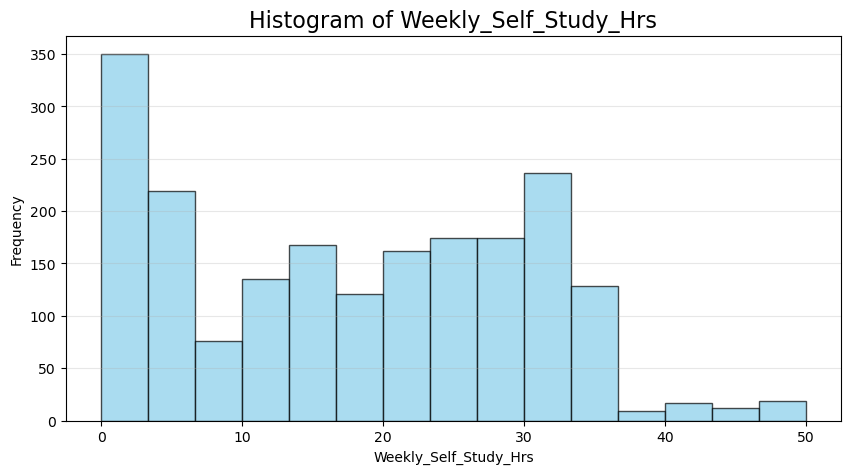

In [14]:
# Histogram of Weekly Study Hrs
plt.figure(figsize=(10,5))
plt.hist(df['weekly_self_study_hours'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Weekly_Self_Study_Hrs', fontsize=16)
plt.xlabel('Weekly_Self_Study_Hrs')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [74]:
# Find probability of each category (P = Frequency / Total) 
cat_column = 'gender'
prob = df[cat_column].value_counts(normalize=True)
print(prob)

gender
female    0.501
male      0.499
Name: proportion, dtype: float64


In [16]:
# Q1. What is the probability that a student is Female?
prob = df[cat_column].value_counts(normalize=True)
print(f"   → {prob.get('female', 0):.4f}")

   → 0.5010


In [17]:
# Q2. What is the probability that a student has a part-time job?
pt_job_prob = df['part_time_job'].value_counts(normalize=True)
print(f"   → {pt_job_prob.get(True, 0):.4f}")

   → 0.1580


In [18]:
# Q3. What is the probability that a student's career aspiration is Doctor?
doctor_prob = df['career_aspiration'].value_counts(normalize=True)
print(f" → {doctor_prob.get('Doctor', 0):.4f}")

 → 0.0595


In [19]:
# Theoretical vs Experimental
print("• Theoretical P(Female) ≈ 0.5 (assuming equal gender ratio)")
print(f"• Experimental P(Female) = {prob.get('female', 0):.4f} → Very close!")

• Theoretical P(Female) ≈ 0.5 (assuming equal gender ratio)
• Experimental P(Female) = 0.5010 → Very close!


In [66]:
#  find the Correlation Coefficient (r) 
x_col = 'math_score'
y_col = 'physics_score'

correlation = df[x_col].corr(df[y_col])
correlation

0.11571874260426188

In [21]:
# Interpretation Strong / Weak
if abs(correlation) >= 0.7:
    strength = "Strong"
elif abs(correlation) >= 0.4:
    strength = "Moderate"
elif abs(correlation) >= 0.2:
    strength = "Weak"
else:
    strength = "Very Weak"

print(f"Interpretation: {strength}")

Interpretation: Very Weak


In [22]:
# Interpretation Positive / Negative / No correlation 
direction = "Positive" if correlation > 0 else "Negative" if correlation < 0 else "No correlation"
print(f"Interpretation: {direction}")

Interpretation: Positive


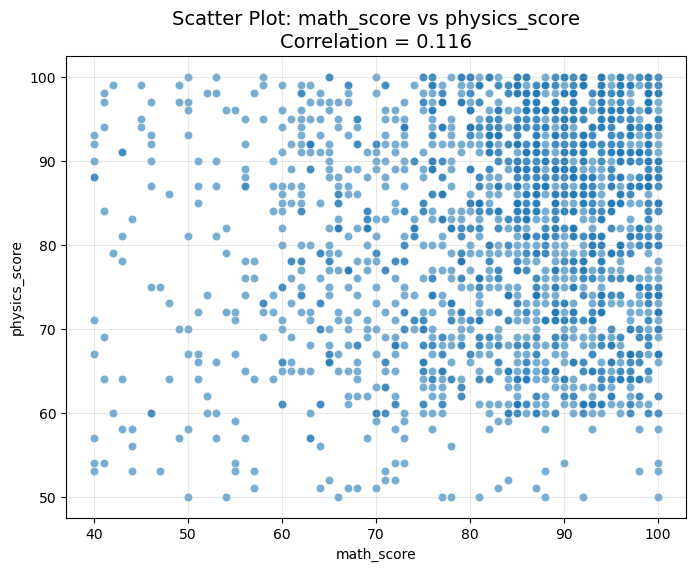

In [23]:
# Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x=x_col, y=y_col, alpha=0.6)
plt.title(f'Scatter Plot: {x_col} vs {y_col}\nCorrelation = {correlation:.3f}', fontsize=14)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.grid(True, alpha=0.3)
plt.show()

In [84]:
X = df['weekly_self_study_hours']
y = df['math_score']

# Perform regression
slope, intercept, r_value, p_value, std_err= stats.linregress(X, y)
slope, intercept, r_value, p_value, std_err

(0.4291085877139124,
 75.83296247084563,
 0.3935692982498627,
 4.3474065784279546e-75,
 0.022423485843242833)

In [80]:
print(f"Regression Equation: math_score = {slope:.3f} × weekly_self_study_hours + {intercept:.2f}")
print(f"R-squared: {r_value**2:.4f}")  

Regression Equation: math_score = 0.429 × weekly_self_study_hours + 75.83
R-squared: 0.1549


In [86]:
# Prediction for new value
new_hours = 30
predicted_score = slope * new_hours + intercept
print(f"If a student studies {new_hours} hours/week → Expected Math Score = {predicted_score:.2f}")

If a student studies 30 hours/week → Expected Math Score = 88.71


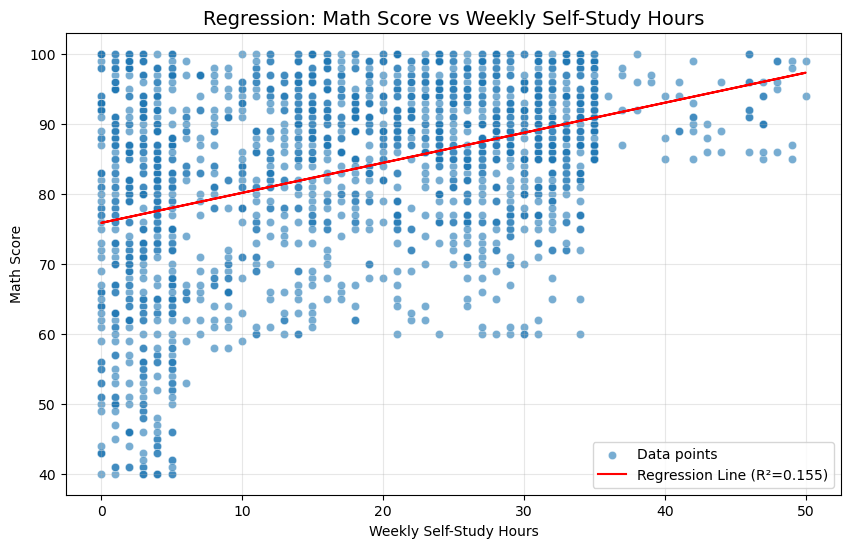

In [88]:
# Plot regression line
plt.figure(figsize=(10,6))
sns.scatterplot(x=X, y=y, alpha=0.6, label='Data points')
plt.plot(X, intercept + slope*X, color='red', label=f'Regression Line (R²={r_value**2:.3f})')
plt.title('Regression: Math Score vs Weekly Self-Study Hours', fontsize=14)
plt.xlabel('Weekly Self-Study Hours')
plt.ylabel('Math Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [58]:
male_scores = df[df['gender'] == 'male']['math_score']
female_scores = df[df['gender'] == 'female']['math_score']

t_stat, p_val = stats.ttest_ind(male_scores, female_scores)

print("Hypothesis:")
print("H₀: There is no difference in math scores between males and females (μ_male = μ_female)")
print("H₁: There is a difference in math scores between males and females (μ_male ≠ μ_female)")

Hypothesis:
H₀: There is no difference in math scores between males and females (μ_male = μ_female)
H₁: There is a difference in math scores between males and females (μ_male ≠ μ_female)


In [92]:
print(f"T-statistic = {t_stat:.3f}")
print(f"P-value     = {p_val:.5f}")

T-statistic = 2.237
P-value     = 0.02539


In [62]:
alpha = 0.05
if p_val < alpha:
    print("→ REJECT H₀: There is a significant difference in math scores by gender.")
else:
    print("→ FAIL TO REJECT H₀: No significant difference found.")

print(f"\nMean Math Score - Male  : {male_scores.mean():.2f}")
print(f"Mean Math Score - Female: {female_scores.mean():.2f}")

→ REJECT H₀: There is a significant difference in math scores by gender.

Mean Math Score - Male  : 84.11
Mean Math Score - Female: 82.79
